#Theory

1. What is Boosting in Machine Learning?

ans- Boosting is an ensemble learning technique that aims to improve the prediction accuracy of "weak learners" (models that are slightly better than random guessing) by combining them into a "strong learner." The core idea is to sequentially train weak learners, with each new learner focusing on the errors made by the previous ones. This iterative process gives more weight to misclassified instances, forcing subsequent learners to pay more attention to them.

2. How does Boosting differ from Bagging?

ans- 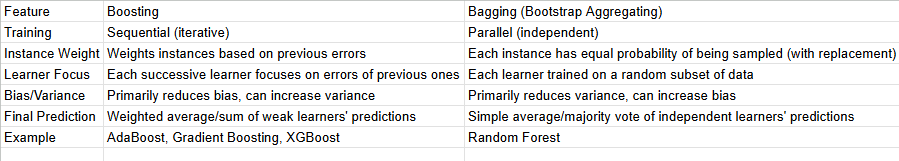

3. What is the key idea behind AdaBoost?

ans- The key idea behind AdaBoost (Adaptive Boosting) is to iteratively adjust the weights of misclassified training instances. In each iteration, a weak learner is trained on the current weighted dataset. Instances that are misclassified by the current weak learner have their weights increased, while correctly classified instances have their weights decreased. This ensures that subsequent weak learners focus more on the "difficult" instances that were previously misclassified, leading to a more robust final model. The final prediction is a weighted sum of the weak learners' predictions, where the weights are determined by their individual accuracies.

4. Explain the working of AdaBoost with an example.

ans- Initialize Weights: Assign equal weights to all training instances. If you have N instances, each instance gets a weight of 1/N.

Example: 5 emails, initial weights: [0.2, 0.2, 0.2, 0.2, 0.2]
Iterate (for M weak learners):

Train a Weak Learner: Train a decision stump on the current weighted dataset. The stump tries to minimize the weighted error.

Calculate Error: Calculate the weighted error rate of the weak learner:
$ \text{Error} = \sum_{i=1}^{N} w_i \times I(\text{predicted}_i \neq \text{actual}_i) $
(where I is the indicator function, 1 if true, 0 if false)

Calculate Learner Weight (α): Calculate the "say" or contribution of this weak learner to the final model:
$ \alpha_m = 0.5 \times \ln\left(\frac{1 - \text{Error}}{\text{Error}}\right) $
A smaller error leads to a larger α
m
​
 , meaning the learner is more reliable.

Update Instance Weights:

For correctly classified instances: w
i
​
 ←w
i
​
 ×e
−α
m
​


For misclassified instances: w
i
​
 ←w
i
​
 ×e
α
m
​


Normalize the weights so they sum to 1. This is crucial for the next iteration.

Combine Learners: The final strong classifier is a weighted sum of all the weak learners:
$ H(x) = \text{sign}\left(\sum_{m=1}^{M} \alpha_m h_m(x)\right) $
(where h
m
​
 (x) is the prediction of the m-th weak learner, and sign gives -1 or 1 for binary classification).

 5. What is Gradient Boosting, and how is it different from AdaBoost?

 ans- Gradient Boosting is an ensemble learning technique that builds an additive model in a forward stagewise manner. Instead of tweaking the instance weights (like AdaBoost), it builds new weak learners (typically decision trees, called regression trees) to directly predict the residuals (errors) of the previous models. It uses a gradient descent-like approach to minimize a user-defined loss function.

 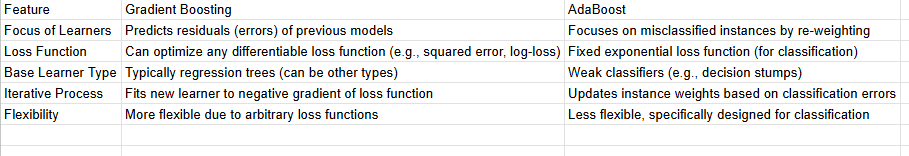

 6. What is the loss function in Gradient Boosting?

 ans- Unlike AdaBoost which has a fixed exponential loss function, Gradient Boosting can use various differentiable loss functions, depending on the task. The goal is to minimize this loss function.

Common loss functions include:

For Regression:

Squared Error Loss: L(y,
y
^
​
 )=(y−
y
^
​
 )
2
  (most common for regression)
Absolute Error Loss: L(y,
y
^
​
 )=∣y−
y
^
​
 ∣ (more robust to outliers)
Huber Loss / Quantile Loss: Combinations for robustness.
For Classification:

Log Loss (Binary Classification): L(y,p)=−[ylog(p)+(1−y)log(1−p)]
Softmax Loss (Multi-class Classification): Extension of log loss.

7. How does XGBoost improve over traditional Gradient Boosting?

ans- XGBoost (eXtreme Gradient Boosting) is an optimized and highly efficient implementation of Gradient Boosting. It introduces several key improvements:

Regularization:

L1 and L2 Regularization: Adds regularization terms to the objective function, penalizing complex models and preventing overfitting. This helps control model complexity.
Shrinkage (Learning Rate): Uses a learning rate to shrink the contribution of each tree, preventing overfitting.
Better Parallelization:

Column Block for Parallel Learning: Stores data in memory in compressed column blocks, allowing parallel computation of gradients and hessians across features. This significantly speeds up tree construction.
Handling Missing Values:

Sparsity-aware Split Finding: XGBoost can automatically handle missing values by learning the best direction to take for missing values during node splitting.
Tree Pruning:

Depth-first Search with Pruning: Builds trees up to a maximum depth and then prunes back based on a gain threshold (similar to C4.5). This is more efficient than greedy breadth-first expansion.
Built-in Cross-Validation:

Allows running cross-validation at each boosting iteration, making it easier to determine the optimal number of boosting rounds.
Hardware Optimization:

Cache-aware access and out-of-core computing for handling large datasets.

8. What is the difference between XGBoost and CatBoost?

ans- Both XGBoost and CatBoost are powerful, optimized gradient boosting libraries, but they have different strengths and approaches, especially concerning categorical features.

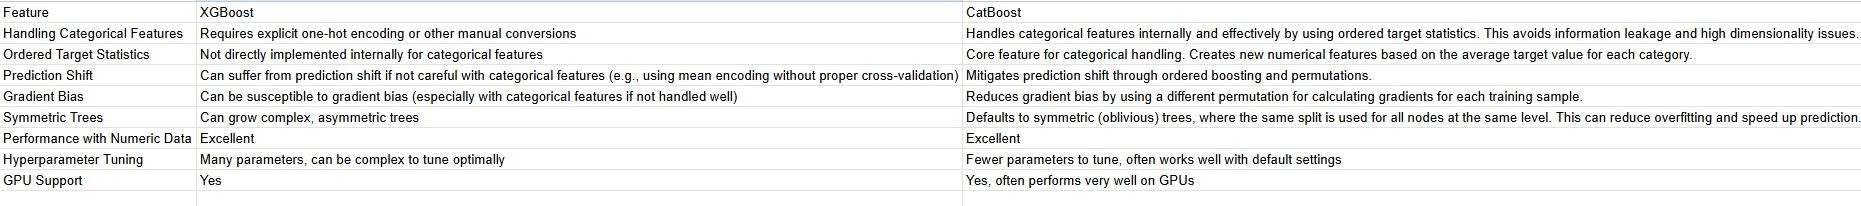

9. What are some real-world applications of Boosting techniques?

ans- Boosting techniques are widely used across various domains due to their high accuracy and robustness.

Web Search Ranking: Google's RankBrain (partially uses Gradient Boosting) for ranking search results.
Recommendation Systems: Predicting user preferences for products, movies, music (e.g., Netflix prize, e-commerce recommendations).
Fraud Detection: Identifying fraudulent transactions in banking, credit card processing, insurance claims.
Image and Object Recognition: Facial recognition, pedestrian detection, medical image analysis (e.g., using AdaBoost for Viola-Jones face detector).
Predictive Analytics: Predicting customer churn, sales forecasting, stock price movements.
Credit Scoring: Assessing creditworthiness of loan applicants.
Bioinformatics: Predicting protein structure, gene expression analysis.
Natural Language Processing (NLP): Sentiment analysis, spam detection, text categorization.
Drug Discovery: Identifying potential drug candidates.
Ad Click-Through Rate Prediction: Predicting whether a user will click on an advertisement.

10. How does regularization help in XGBoost?

ans- Regularization in XGBoost is crucial for preventing overfitting and improving the generalization ability of the model. It adds penalty terms to the objective function, encouraging simpler models.

XGBoost uses two main types of regularization:

L1 Regularization (Lasso): Adds a penalty proportional to the absolute value of the sum of the weights of the leaves. This encourages sparsity in the leaf weights, effectively performing feature selection at the tree level.

$ \Omega(\text{tree}) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^{T} w_j^2 + \alpha \sum_{j=1}^{T} |w_j| $ (Here, α is the L1 regularization term, usually λ for L2).
L2 Regularization (Ridge): Adds a penalty proportional to the square of the sum of the weights of the leaves. This encourages smaller, more spread-out weights, making the model more robust to noise.

$ \Omega(\text{tree}) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^{T} w_j^2 $ (Here, λ is the L2 regularization term)
Gamma (γ): This parameter specifies the minimum loss reduction required to make a further partition on a leaf node of the tree. It's essentially a complexity control. A larger γ leads to more conservative (smaller) trees.

Shrinkage (Learning Rate, eta or learning_rate): This is a critical regularization technique. After each tree is added, its contribution to the overall prediction is multiplied by eta. This reduces the influence of each individual tree and leaves more room for subsequent trees to correct errors, making the learning process more conservative and preventing rapid overfitting.

11. What are some hyperparameters to tune in Gradient Boosting models?

ans- Tuning hyperparameters is essential for optimizing the performance of Gradient Boosting models. Here are some key ones:

n_estimators (or num_boost_round): The number of boosting stages (trees) to perform. More trees can lead to better performance but also increase training time and risk of overfitting. Often tuned with early stopping.
learning_rate (or eta): Shrinkage parameter. Controls the step size at each iteration, reducing the contribution of each tree. Smaller values require more n_estimators but often lead to better generalization.
max_depth: The maximum depth of each individual tree. Controls the complexity of individual trees. Deeper trees can capture more complex relationships but are more prone to overfitting.
subsample: The fraction of samples to be used for fitting the individual base learners. Using a fraction less than 1.0 introduces randomness and reduces variance (similar to Bagging).
colsample_bytree / colsample_bylevel / colsample_bynode: The fraction of features (columns) to be considered when building each tree or at each split. Introduces randomness and prevents overfitting.
min_child_weight: In tree-based models, this is the minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. This controls overfitting.
gamma (or min_split_loss): Minimum loss reduction required to make a further partition on a leaf node. Higher values lead to more conservative trees.
reg_alpha (L1 regularization) and reg_lambda (L2 regularization): Regularization terms on weights. Used to prevent overfitting by penalizing large weights.
objective: The loss function to be optimized (e.g., 'reg:squarederror', 'binary:logistic', 'multi:softmax').
eval_metric: The metric used for evaluation during training (e.g., 'rmse', 'auc', 'logloss').

12. What is the concept of Feature Importance in Boosting?

ans- Feature importance in boosting refers to the relative contribution of each feature to the overall prediction of the model. It quantifies how useful or valuable each feature is in the model's decision-making process.

In tree-based boosting algorithms (like Gradient Boosting, XGBoost, CatBoost), feature importance is typically calculated in a few ways:

"Gain" (most common): This measures the average gain (or reduction in loss/impurity) of splits that the feature contributes across all trees in the ensemble. A higher gain means the feature is more important in reducing the impurity/loss of the model.
"Weight" (or "Frequency"): This is the number of times a feature appears in the splitting criteria of trees in the ensemble.
"Cover": This is the average number of samples (or sum of hessian) affected by splits on that feature.

13. Why is CatBoost efficient for categorical data?

ans- CatBoost is particularly efficient and effective for categorical data due to its unique and robust approaches:

Ordered Target Statistics (Ordered TS): This is the most significant innovation.

Problem with traditional methods: Simple mean encoding (replacing a category with the average target value of that category) can lead to "prediction shift" or "target leakage." This happens because the target value used to compute the mean for a category is based on the entire dataset, including the current sample being processed, leading to an overly optimistic estimate during training.
CatBoost's Solution: CatBoost uses a per-permutation ordered target statistic. For each sample in the training set, the target statistic for a categorical feature is calculated using only the previous samples in a random permutation of the training data. This prevents target leakage and makes the mean encoding more robust. It essentially simulates an online learning setting where the target statistic for a category is estimated based on data seen before the current sample.
Ordered Boosting (Permutation-driven Boosting):

Problem with traditional Gradient Boosting: Gradient estimates for current samples can be biased if they are computed using models trained on the same data (including the current sample).
CatBoost's Solution: It uses a modified boosting scheme where for each step, it trains a new model on a different permutation of the data to calculate the gradients. This reduces the prediction shift and makes the gradient estimates less biased, leading to more accurate models, especially with categorical features.
Symmetric (Oblivious) Trees as Base Learners:

CatBoost defaults to using symmetric trees, where the same splitting condition is applied to all nodes at the same level.
Advantages for categorical data:
Reduces overfitting: The constrained structure acts as a form of regularization.
Faster prediction: The symmetric structure allows for very fast, vectorized inference.
Efficient CPU/GPU utilization: The fixed tree structure is well-suited for parallel computation.


#Practical

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error, f1_score, confusion_matrix, roc_curve, auc, log_loss
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Often used as base estimator for AdaBoost

import xgboost as xgb
import catboost as cb

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set a random seed for reproducibility
np.random.seed(42)

In [ ]:
from sklearn.datasets import load_breast_cancer, load_diabetes

# Load Breast Cancer dataset for classification
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Load Diabetes dataset for regression
diabetes = load_diabetes()
X_diab, y_diab = diabetes.data, diabetes.target
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_diab, y_diab, test_size=0.2, random_state=42)

14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [ ]:
print("--- Task 14: AdaBoost Classifier Accuracy ---")
# Initialize AdaBoost Classifier with a base estimator (e.g., DecisionTreeClassifier)
# A common choice for AdaBoost's weak learner is a Decision Stump (max_depth=1)
adaboost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Train the model
adaboost_clf.fit(X_train_bc, y_train_bc)

# Make predictions
y_pred_bc = adaboost_clf.predict(X_test_bc)

# Calculate and print accuracy
accuracy = accuracy_score(y_test_bc, y_pred_bc)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")
print("-" * 50)

15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [ ]:
print("--- Task 15: AdaBoost Regressor MAE ---")
# Initialize AdaBoost Regressor with a base estimator (e.g., DecisionTreeRegressor)
adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)

# Train the model
adaboost_reg.fit(X_train_diab, y_train_diab)

# Make predictions
y_pred_diab = adaboost_reg.predict(X_test_diab)

# Calculate and print MAE
mae = mean_absolute_error(y_test_diab, y_pred_diab)
print(f"AdaBoost Regressor MAE: {mae:.4f}")
print("-" * 50)

16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [ ]:
print("--- Task 16: Gradient Boosting Classifier Feature Importance ---")
# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train_bc, y_train_bc)

# Get feature importance
feature_importances = gb_clf.feature_importances_
feature_names = breast_cancer.feature_names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Gradient Boosting Classifier Feature Importance:")
print(importance_df)

# Optional: Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10)) # Plot top 10 features
plt.title('Top 10 Gradient Boosting Classifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("-" * 50)

17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [ ]:
print("--- Task 17: Gradient Boosting Regressor R-Squared ---")
# Initialize Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_reg.fit(X_train_diab, y_train_diab)

# Make predictions
y_pred_diab_gb = gb_reg.predict(X_test_diab)

# Calculate and print R-squared score
r_squared = r2_score(y_test_diab, y_pred_diab_gb)
print(f"Gradient Boosting Regressor R-Squared: {r_squared:.4f}")
print("-" * 50)

18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [ ]:
print("--- Task 18: XGBoost vs Gradient Boosting Classifier Accuracy ---")
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_bc, y_train_bc)
y_pred_xgb_bc = xgb_clf.predict(X_test_bc)
xgb_accuracy = accuracy_score(y_test_bc, y_pred_xgb_bc)
print(f"XGBoost Classifier Accuracy: {xgb_accuracy:.4f}")

# Gradient Boosting Classifier (already trained in Task 16, just reuse predictions)
# gb_clf (from Task 16) is already trained
gb_accuracy = accuracy_score(y_test_bc, gb_clf.predict(X_test_bc))
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")

print("Comparison:")
if xgb_accuracy > gb_accuracy:
    print("XGBoost performed better.")
elif gb_accuracy > xgb_accuracy:
    print("Gradient Boosting performed better.")
else:
    print("Both performed similarly.")
print("-" * 50)

19. Train a CatBoost Classifier and evaluate using F1-Score.

In [ ]:
print("--- Task 19: CatBoost Classifier F1-Score ---")
# CatBoost Classifier
# CatBoost handles categorical features automatically. For numerical datasets like breast_cancer,
# it will treat all features as numerical unless explicitly told otherwise.
cat_clf = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6,
                                 loss_function='Logloss', eval_metric='F1',
                                 random_seed=42, verbose=0) # verbose=0 to suppress training output

cat_clf.fit(X_train_bc, y_train_bc)

y_pred_cat_bc = cat_clf.predict(X_test_bc)
f1 = f1_score(y_test_bc, y_pred_cat_bc)
print(f"CatBoost Classifier F1-Score: {f1:.4f}")
print("-" * 50)

20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [ ]:
print("--- Task 20: XGBoost Regressor MSE ---")
# XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

xgb_reg.fit(X_train_diab, y_train_diab)

y_pred_xgb_diab = xgb_reg.predict(X_test_diab)
mse = mean_squared_error(y_test_diab, y_pred_xgb_diab)
print(f"XGBoost Regressor MSE: {mse:.4f}")
print("-" * 50)

21. Train an AdaBoost Classifier and visualize feature importance.

In [ ]:
print("--- Task 21: AdaBoost Classifier Feature Importance Visualization ---")
# Initialize AdaBoost Classifier with a base estimator
adaboost_clf_imp = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=42)
adaboost_clf_imp.fit(X_train_bc, y_train_bc)

# AdaBoost doesn't have a direct feature_importances_ attribute that sums contributions
# across all boosted trees easily for all weak learners.
# However, for Decision Trees, you can access the feature importances of each tree.
# We'll average the feature importances of the individual estimators.
base_estimator_importances = [estimator.feature_importances_ for estimator in adaboost_clf_imp.estimators_]
avg_feature_importances = np.mean(base_estimator_importances, axis=0)

feature_importance_df_ada = pd.DataFrame({'Feature': breast_cancer.feature_names, 'Importance': avg_feature_importances})
feature_importance_df_ada = feature_importance_df_ada.sort_values(by='Importance', ascending=False)

print("AdaBoost Classifier (Average Base Estimator) Feature Importance:")
print(feature_importance_df_ada.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_ada.head(10))
plt.title('Top 10 AdaBoost Classifier Feature Importance (Average of Base Estimators)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("-" * 50)

22. Train a Gradient Boosting Regressor and plot learning curves.

In [ ]:
print("--- Task 22: Gradient Boosting Regressor Learning Curves ---")
# Initialize Gradient Boosting Regressor
gb_reg_lc = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gb_reg_lc, X_diab, y_diab, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', random_state=42
)

# Convert scores to positive MSE
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MSE")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Gradient Boosting Regressor Learning Curves")
plt.legend(loc="best")
plt.grid()
plt.show()
print("-" * 50)

23. Train an XGBoost Classifier and visualize feature importance.

In [ ]:
print("--- Task 23: XGBoost Classifier Feature Importance Visualization ---")
# Initialize XGBoost Classifier
xgb_clf_imp = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf_imp.fit(X_train_bc, y_train_bc)

# Get feature importance
feature_importances_xgb = xgb_clf_imp.feature_importances_
feature_names_xgb = breast_cancer.feature_names

importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

print("XGBoost Classifier Feature Importance:")
print(importance_df_xgb.head(10))

# Plot feature importance using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb.head(10))
plt.title('Top 10 XGBoost Classifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# XGBoost also has a built-in plot_importance function
print("\nXGBoost built-in feature importance plot:")
xgb.plot_importance(xgb_clf_imp, max_num_features=10) # Plot top 10 features
plt.title('XGBoost Classifier Feature Importance (Built-in)')
plt.show()
print("-" * 50)

24. Train a CatBoost Classifier and plot the confusion matrix.

In [ ]:
print("--- Task 24: CatBoost Classifier Confusion Matrix ---")
# Initialize CatBoost Classifier
cat_clf_cm = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6,
                                  loss_function='Logloss', random_seed=42, verbose=0)

cat_clf_cm.fit(X_train_bc, y_train_bc)

y_pred_cat_cm = cat_clf_cm.predict(X_test_bc)

# Calculate confusion matrix
cm = confusion_matrix(y_test_bc, y_pred_cat_cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names,
            yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()
print("-" * 50)

25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

In [ ]:
print("--- Task 25: AdaBoost Classifier Accuracy with Different Estimators ---")
n_estimators_list = [10, 50, 100, 200, 300]
accuracies = []

for n in n_estimators_list:
    ada_clf_n = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, random_state=42)
    ada_clf_n.fit(X_train_bc, y_train_bc)
    y_pred_n = ada_clf_n.predict(X_test_bc)
    acc = accuracy_score(y_test_bc, y_pred_n)
    accuracies.append(acc)
    print(f"AdaBoost Classifier (n_estimators={n}) Accuracy: {acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title('AdaBoost Classifier Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
print("-" * 50)

26. Train a Gradient Boosting Regressor and visualize the ROC curve.

In [ ]:
print("--- Task 26: Gradient Boosting Classifier ROC Curve ---")
# Re-use gb_clf from Task 16 or initialize a new one for clarity
gb_clf_roc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf_roc.fit(X_train_bc, y_train_bc)

# Get predicted probabilities for the positive class
y_pred_proba_gb = gb_clf_roc.predict_proba(X_test_bc)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_bc, y_pred_proba_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print("-" * 50)

27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [ ]:
print("--- Task 27: XGBoost Regressor Learning Rate Tuning with GridSearchCV ---")
# Define the parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Initialize XGBoost Regressor
xgb_reg_grid = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg_grid, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_diab, y_train_diab)

# Print best parameters and best score
print(f"Best learning_rate: {grid_search.best_params_['learning_rate']}")
print(f"Best cross-validation MSE (negative): {grid_search.best_score_:.4f}")
print(f"Best cross-validation RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

# Evaluate on test set with the best estimator
best_xgb_reg = grid_search.best_estimator_
y_pred_tuned = best_xgb_reg.predict(X_test_diab)
tuned_mse = mean_squared_error(y_test_diab, y_pred_tuned)
print(f"Test MSE with tuned learning rate: {tuned_mse:.4f}")
print("-" * 50)

28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [ ]:
print("--- Task 28: CatBoost Classifier on Imbalanced Data with Class Weighting ---")

# Create an imbalanced dataset for demonstration
# We'll artificially reduce the number of samples for class 1 (malignant) in breast cancer data
X_imb, y_imb = breast_cancer.data, breast_cancer.target
# Find indices of class 0 (benign) and class 1 (malignant)
idx_class_0 = np.where(y_imb == 0)[0]
idx_class_1 = np.where(y_imb == 1)[0]

# Keep all of class 0, and a small fraction of class 1
fraction_class_1 = 0.2 # Keep only 20% of class 1 samples
num_class_1_to_keep = int(len(idx_class_1) * fraction_class_1)
np.random.shuffle(idx_class_1) # Shuffle to pick random samples
idx_class_1_kept = idx_class_1[:num_class_1_to_keep]

# Combine indices
imbalanced_indices = np.concatenate((idx_class_0, idx_class_1_kept))
X_imbalanced = X_imb[imbalanced_indices]
y_imbalanced = y_imb[imbalanced_indices]

print(f"Original class distribution: Class 0: {np.sum(y_bc == 0)}, Class 1: {np.sum(y_bc == 1)}")
print(f"Imbalanced class distribution: Class 0: {np.sum(y_imbalanced == 0)}, Class 1: {np.sum(y_imbalanced == 1)}")

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imbalanced, y_imbalanced, test_size=0.2, random_state=42, stratify=y_imbalanced)

# --- Model WITHOUT class weighting ---
print("\n--- Training CatBoost WITHOUT class weighting ---")
cat_clf_no_weights = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6,
                                          loss_function='Logloss', eval_metric='F1',
                                          random_seed=42, verbose=0)
cat_clf_no_weights.fit(X_train_imb, y_train_imb)
y_pred_no_weights = cat_clf_no_weights.predict(X_test_imb)
f1_no_weights = f1_score(y_test_imb, y_pred_no_weights)
print(f"F1-Score (without weights): {f1_no_weights:.4f}")
cm_no_weights = confusion_matrix(y_test_imb, y_pred_no_weights)
print("Confusion Matrix (without weights):\n", cm_no_weights)


# --- Model WITH class weighting ---
# Calculate class weights
# Option 1: Using scikit-learn's compute_class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_imb), y=y_train_imb)
weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"\nCalculated class weights: {weights_dict}")

print("\n--- Training CatBoost WITH class weighting ---")
cat_clf_with_weights = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6,
                                             loss_function='Logloss', eval_metric='F1',
                                             random_seed=42, verbose=0,
                                             class_weights=weights_dict) # Apply class weights
cat_clf_with_weights.fit(X_train_imb, y_train_imb)
y_pred_with_weights = cat_clf_with_weights.predict(X_test_imb)
f1_with_weights = f1_score(y_test_imb, y_pred_with_weights)
print(f"F1-Score (with weights): {f1_with_weights:.4f}")
cm_with_weights = confusion_matrix(y_test_imb, y_pred_with_weights)
print("Confusion Matrix (with weights):\n", cm_with_weights)

print("\nComparison:")
print(f"F1-Score improved by {f1_with_weights - f1_no_weights:.4f} with class weighting.")
print("-" * 50)

29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

In [ ]:
print("--- Task 29: AdaBoost Classifier Effect of Learning Rates ---")
learning_rates = [0.1, 0.5, 1.0, 1.5, 2.0] # learning_rate in AdaBoost is called `learning_rate`
accuracies_lr = []

for lr in learning_rates:
    ada_clf_lr = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=lr, random_state=42)
    ada_clf_lr.fit(X_train_bc, y_train_bc)
    y_pred_lr = ada_clf_lr.predict(X_test_bc)
    acc_lr = accuracy_score(y_test_bc, y_pred_lr)
    accuracies_lr.append(acc_lr)
    print(f"AdaBoost Classifier (learning_rate={lr}) Accuracy: {acc_lr:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies_lr, marker='o')
plt.title('AdaBoost Classifier Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
print("-" * 50)

30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [ ]:
print("--- Task 30: XGBoost Multi-Class Classification with Log-Loss ---")
from sklearn.datasets import load_iris

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

# Initialize XGBoost Classifier for multi-class
# objective='multi:softprob' outputs probabilities for each class
# num_class must be specified for multi-class
xgb_multi_clf = xgb.XGBClassifier(objective='multi:softprob',
                                  num_class=len(np.unique(y_iris)),
                                  n_estimators=100,
                                  learning_rate=0.1,
                                  use_label_encoder=False,
                                  eval_metric='mlogloss', # Multi-class logloss
                                  random_state=42)

xgb_multi_clf.fit(X_train_iris, y_train_iris)

# Get predicted probabilities for log-loss calculation
y_pred_proba_multi = xgb_multi_clf.predict_proba(X_test_iris)

# Calculate log-loss
logloss = log_loss(y_test_iris, y_pred_proba_multi)
print(f"XGBoost Multi-Class Classifier Log-Loss: {logloss:.4f}")

# Also check accuracy for completeness
y_pred_multi_class = xgb_multi_clf.predict(X_test_iris)
accuracy_multi = accuracy_score(y_test_iris, y_pred_multi_class)
print(f"XGBoost Multi-Class Classifier Accuracy: {accuracy_multi:.4f}")
print("-" * 50)